In [2]:
import warnings
warnings.filterwarnings("ignore")
import control as c
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sp
import plotly.offline as py
py.init_notebook_mode(True)
s=c.tf([1,0],1)

Kontrol-sistema jarraitu bat osatuta dago, kate zuzenean, planta eta kontrolagailu batekin, 

$$\begin{array}{ccc}
G_{p}(s)={\displaystyle \frac{163320}{8502+8350.85s+189s^{2}+s^{3}}} & \text{eta}
& G_{c}(s)={\displaystyle \frac{0.5\,(s+1)}{s+0.05}}\end{array}$$

, hurrenez hurren. Kontrolagailua aldatu nahi da bertsio digital bat erabiltzeko, horretarako emulazio teknika erabiliz. Aukeratu lagintzeko periodo egokia eta lortu kontrolagailu diskretua. Aztertu sistemaren prezisioa kontrolagailuaren irabaziaren arabera, beste K gehigarria txertatuz.

In [3]:
gc=163320/(8502+8350.85*s+189*s**2+s**3)  
gp=0.5*(s+1)/(s+0.05)

Plana eta kontrolgailua definituta, lagintze periodoa kalkulatu behar da; adbidez, maiztasun eremuko informazioa erabiliz

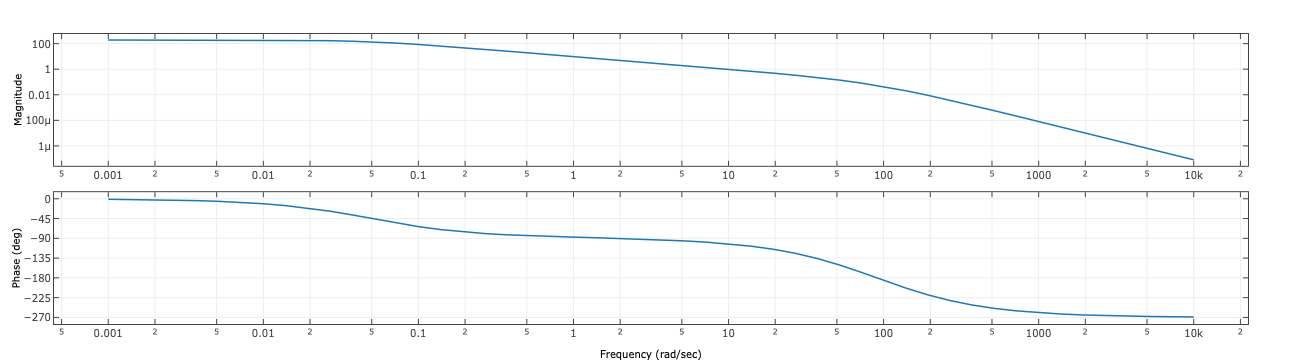

Irabazi kritikoko maiztasuna ~10


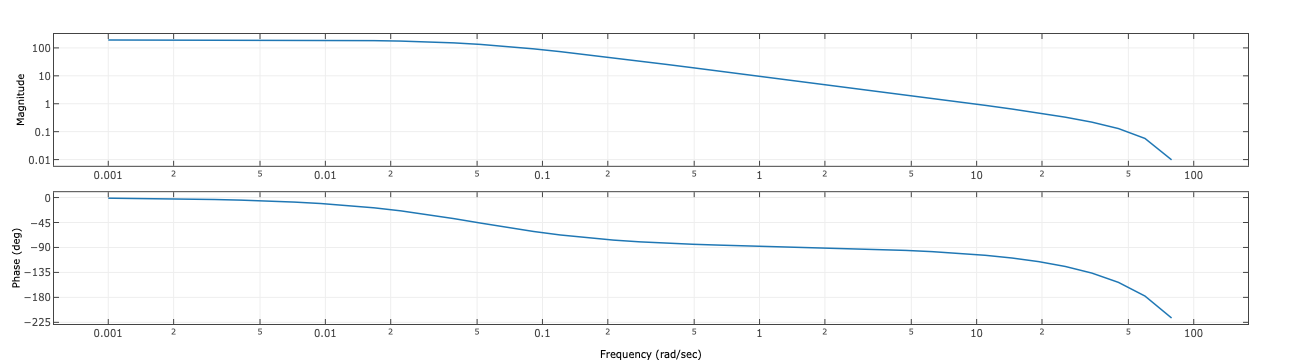

Fase-margin berria ~53
Era zehatzean: (0.08442312645733284, 108.13707851029665, 20.330992672233446, 0.8176255502535509, 0.15282156785814674, 0.4750030479343272)


In [7]:
c.bode(gc*gp)
f=plt.gcf();py.iplot_mpl(f)
print('Irabazi kritikoko maiztasuna ~10')
wik=10
Tl=2*sp.pi/(wik*20)
gpz=c.c2d(gp,Tl)
gcz=c.c2d(gc,Tl,method='tustin') # beste aukera Euler izan daiteke, baina kontrolagailuy mota hauentzat (atzerapen sarea) Tustineko transformatu bilineala egokia da
c.bode(gcz*gpz)
f=plt.gcf();py.iplot_mpl(f)
print('Fase-margin berria ~75')
#print('Era zehatzean:', c.margins.stability_margins(gcz*gpz))

Ikusten da egoera honetan sistema oso egonkorra dela eta egonkorreko errorea errez lortu daiteke

In [9]:
Kp=(gpz*gcz).horner(1)
ess=1/(1+Kp)

print('Kp errore konstantea:', Kp, 'Egonkorreko errorea', ess)

Kp errore konstantea: [[192.09597742+0.j]] Egonkorreko errorea [[0.00517877+0.j]]


Orain beste K gehigarri bat ipintzen bada sisteman, egonkorreko errorea horren menpe izango da
$Kp=192.1*K$ eta $ess=\frac{1}{192.1*K}$

Halere, sistema egonkorra izan behar da. Egonklortasuna K-ren menpe hanbait metodo erabili ahal dugu. Adibidez, erroen kokaera  

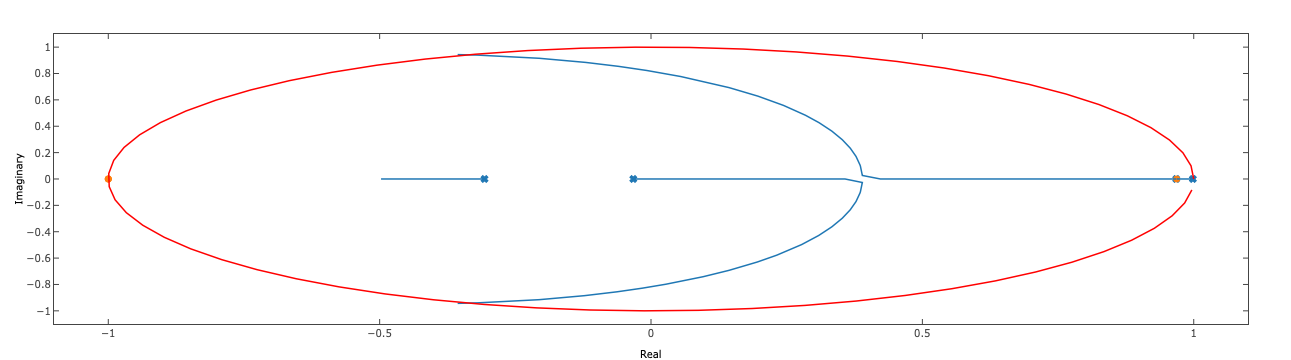

In [14]:
c.rlocus(gpz*gcz,sp.r_[0:20:0.01])
data=sp.exp(sp.r_[0:2*sp.pi:0.1]*1j)
plt.plot(data.real,data.imag,'r')
f=plt.gcf();py.iplot_mpl(f)

Ikusten denez K=20 denean, gutxi gorabeghera sistema ezegonkortzen da eta prezisio maximoa horrela kalkulatu daiteke

Bestalde, gogoratu daiteke sistema diskretu guztiak ezegonkortzen direla K baterako, lagintze maiztasunaren arabera. Sistema jarraituaren egonkortasun muga kalkulatzen bada berdin

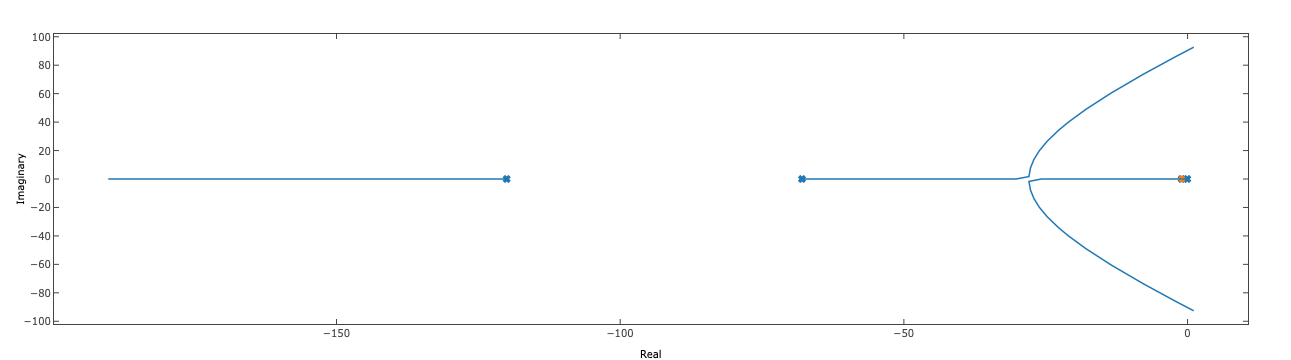

In [15]:
c.rlocus(gp*gc,sp.r_[0:20:0.01])
f=plt.gcf();py.iplot_mpl(f)

Ikusten da egonkortsaun muga antzekoa dela eta, beraz, lagintzea ez dela txarra izan.